In [83]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def my_kernel(r,alpha):
  d = 2*alpha+1
  rx, ry = alpha, alpha
  x , y = np.indices((d,d))
  return (np.hypot(x-rx,y-ry)<=r+0.5).astype(int)

# with np.printoptions(threshold=np.inf):
#     print(kernel)

In [91]:
def my_radius(pixel,alpha,mask):

  kernel_base = my_kernel(alpha,alpha)
  patch = mask[pixel[0]-alpha:pixel[0]+alpha+1,pixel[1]-alpha:pixel[1]+alpha+1]
  kernel_base = np.multiply(kernel_base,patch)

  x , y = np.where(kernel_base < 0.5)
  rx , ry = alpha, alpha

  hyp = np.hypot(x-rx,y-ry)
  r = np.min(np.hypot(x-rx,y-ry)).astype(int)

  return min(r,alpha)

In [133]:
img_path = "bird.jpg"
mask_path = "birdb.jpg"

img = cv2.imread(img_path)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.copyMakeBorder(mask,40,40,40,40,cv2.BORDER_CONSTANT,value=255)
img = cv2.copyMakeBorder(img,40,40,40,40,cv2.BORDER_REFLECT_101)
mask = (mask/255).astype(int)

In [123]:
alpha = 40
img_new = np.zeros((img.shape[0],img.shape[1],3))
for i in range(40,img.shape[0]-40):
  for j in range(40,img.shape[1]-40):
    if(mask[i,j] == 0):
      img_new[i,j] = img[i,j]
      continue
    pixel = [i,j]
    r = my_radius(pixel,alpha,mask)
    kernel = my_kernel(r,alpha)
    kernel = kernel/np.sum(kernel)

    img_new[i,j,0] = np.sum(np.multiply(img[i-alpha:i+alpha+1,j-alpha:j+alpha+1,0],kernel))
    img_new[i,j,1] = np.sum(np.multiply(img[i-alpha:i+alpha+1,j-alpha:j+alpha+1,1],kernel))
    img_new[i,j,2] = np.sum(np.multiply(img[i-alpha:i+alpha+1,j-alpha:j+alpha+1,2],kernel))

img_new = img_new[40:img.shape[0]-40,40:img.shape[1]-40]

In [ ]:
plt.imshow(img_new, cmap = 'gray')
plt.show()
cv2.imwrite("bird_blur.png", img_new)

In [134]:
alpha = 40
radius = np.zeros((img.shape[0],img.shape[1]))

for i in range(40,img.shape[0]-40):
  for j in range(40,img.shape[1]-40):

    pixel = [i,j]
    r = my_radius(pixel,alpha,mask)

    radius[i,j] = r

radius = radius[40:img.shape[0]-40,40:img.shape[1]-40]

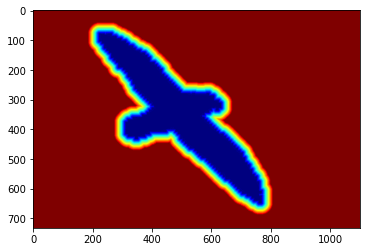

In [135]:
plt.imshow(radius, cmap = 'jet')
plt.show()